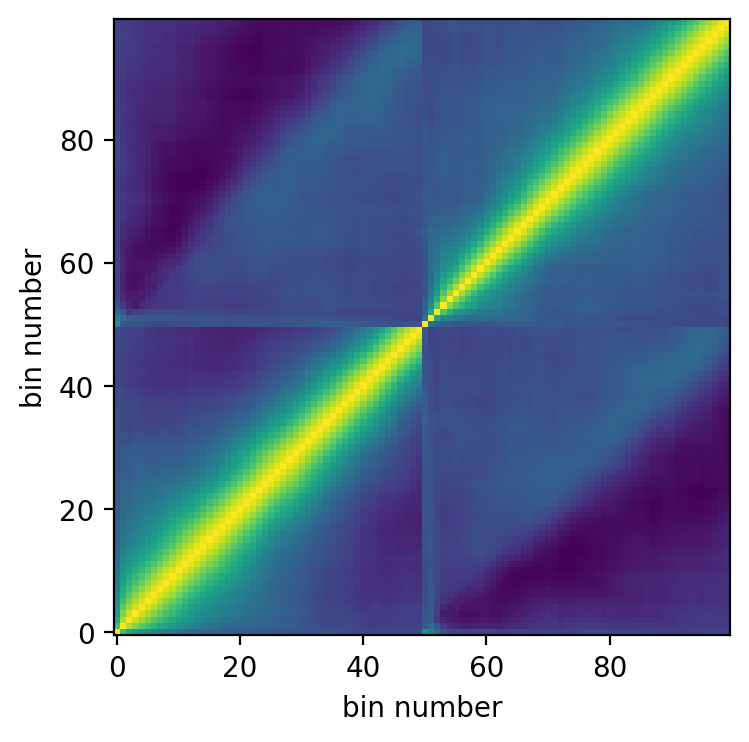

Loaded LHC with shape: (8500, 20), (8500, 100)


In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
from pycorr import TwoPointCorrelationFunction
import numpy as np
import pandas as pd
from astropy.stats import sigma_clip
%matplotlib inline
%config InlineBackend.figure_format='retina'

def read_covariance():
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/cosmo+hod/z0.5/yuan23_prior/ph000/seed0/'
    data_fn = Path(data_dir) / f'tpcf_lhc.npy'
    y = np.load(data_fn, allow_pickle=True).item()['cov_y']
    prefactor = 1 / 8
    cov = prefactor * np.cov(y, rowvar=False)
    corr = np.corrcoef(y, rowvar=False)
    return cov, corr

def read_lhc():
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/cosmo+hod/z0.5/yuan23_prior/ph000/seed0/'
    data_fn = Path(data_dir) / f'tpcf_lhc.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    lhc_x = data['lhc_x']
    lhc_x_names = data['lhc_x_names']
    lhc_y = data['lhc_y']
    return lhc_x, lhc_y, lhc_x_names

covariance_matrix, correlation_matrix = read_covariance()

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(correlation_matrix, origin='lower')
ax.set_xlabel('bin number')
ax.set_ylabel('bin number')
plt.show()

lhc_x, lhc_y, lhc_x_names = read_lhc()
print(f'Loaded LHC with shape: {lhc_x.shape}, {lhc_y.shape}')

Removed no burn in
Removed no burn in
Removed no burn in


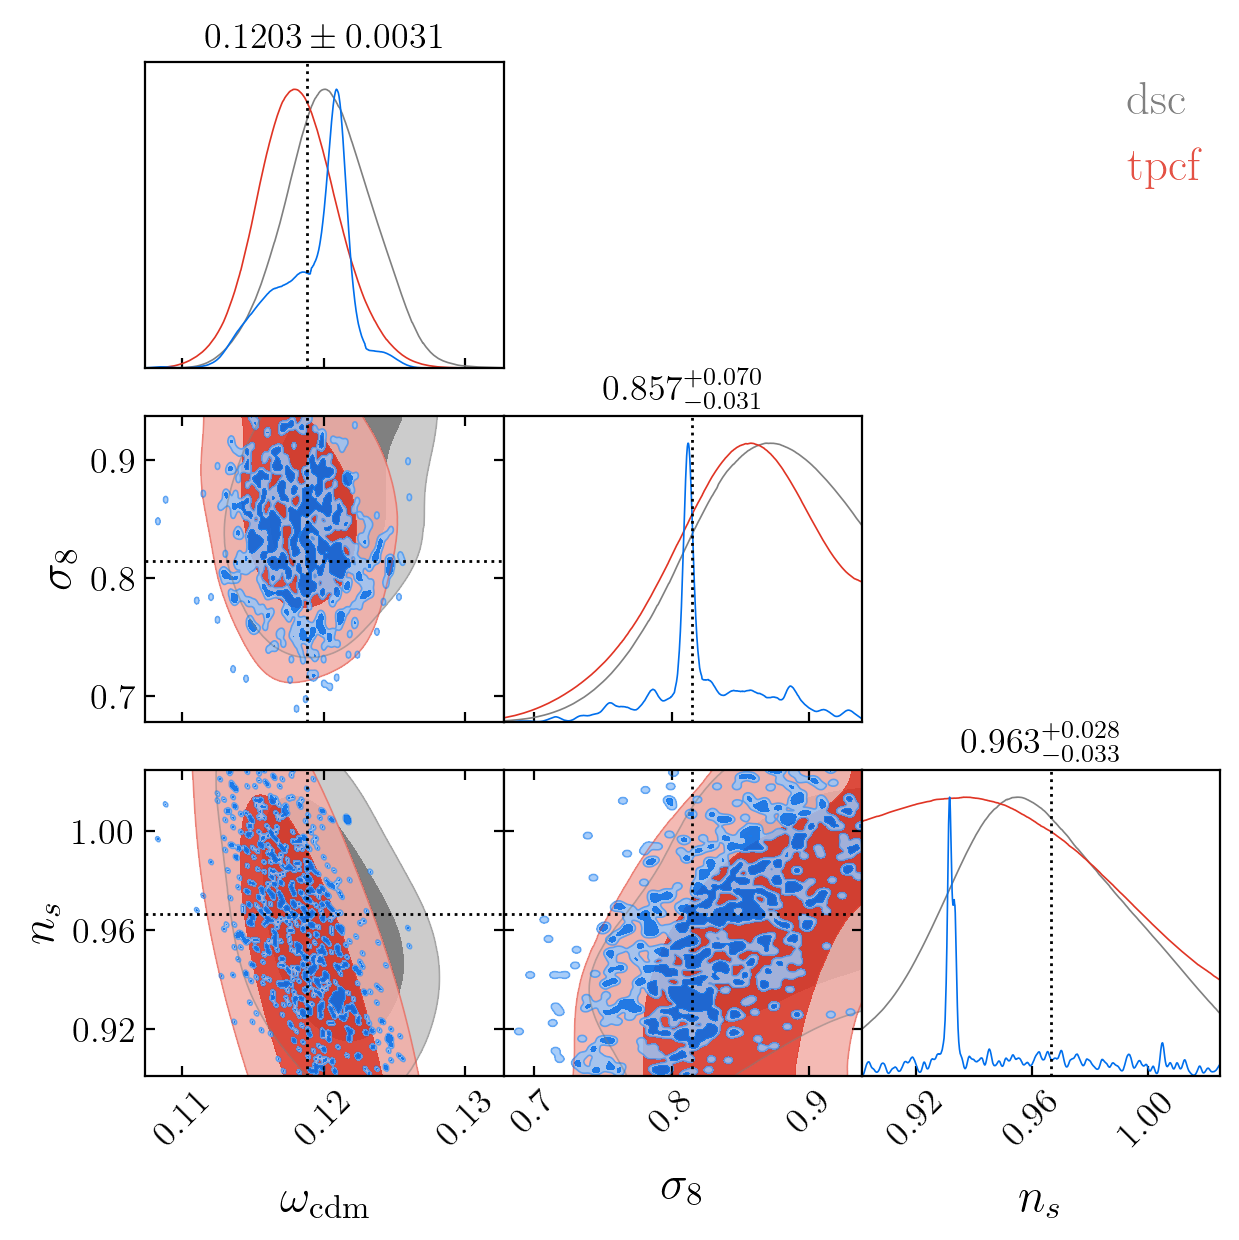

In [17]:
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels = {
    "omega_b": r"\omega_{\rm b}",
    "omega_cdm": r"\omega_{\rm cdm}",
    "sigma8_m": r"\sigma_8",
    "n_s": r"n_s",
    "nrun": r"\alpha_s",
    "N_ur": r"N_{\rm ur}",
    "w0_fld": r"w_0",
    "wa_fld": r"w_a",
    "logM_1": r"\log M_1",
    "logM_cut": r"\log M_{\rm cut}",
    "alpha": r"\alpha",
    "alpha_s": r"\alpha_{\rm vel, s}",
    "alpha_c": r"\alpha_{\rm vel, c}",
    "sigma": r"\log \sigma",
    "kappa": r"\kappa",
    "A_cen": r"A_{\rm cen}",
    "A_sat": r"A_{\rm sat}",
    "B_cen": r"B_{\rm cen}",
    "B_sat": r"B_{\rm sat}",
    "s": r"$s$",
    "fsigma8": r"f \sigma_8",
    "Omega_m": r"\Omega_{\rm m}",
    "H0": r"H_0",
}


# stats = ['wst', 'dsc_conf', 'dsc_fourier', 'minkowski']

chains = []

# truth = dict(zip(lhc_x_names, lhc_x[idx_fit]))

truth = {
    'Omega_m': 0.3089,
    'omega_cdm': 0.1188,
    'omega_b': 0.02230,
    'h': 0.6774,
    'n_s': 0.9667,
    'sigma8_m': 0.8147
}


data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/diffsky/lcdm/dsc_conf_cross/posterior_cosmo+hod_smin10.npy'
data = np.load(data_fn, allow_pickle=True).item()
chains.append(
    MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[labels[n] for n in data['names']],
        )
)

data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/diffsky/lcdm/tpcf/posterior_cosmo+hod_smin10.npy'
data = np.load(data_fn, allow_pickle=True).item()
chains.append(
    MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[labels[n] for n in data['names']],
        )
)

data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/diffsky/lcdm/tpcf/posterior_cosmo+hod_smin5.npy'
data = np.load(data_fn, allow_pickle=True).item()
chains.append(
    MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[labels[n] for n in data['names']],
        )
)


# data_fn = f'/global/homes/e/epaillas/code/acm/projects/emc/posterior_cosmo+hod_tpcf_idx{idx_fit}.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# print(data['names'])

# for key, value in data['ranges'].items():
#     data['ranges'][key] = value - truth[key]
#     # data['ranges'][key] = value

# chains.append(
#     MCSamples(
#             samples=data['samples']  - [truth[name] for name in data['names']],
#             # samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[labels[n] for n in data['names']],
#         )
# )
    
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = ":"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = False
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6

g.triangle_plot(
    roots=chains,
    legend_labels=['dsc', 'tpcf'],
    filled=True,
    markers=truth,
    params=['omega_cdm', 'sigma8_m', 'n_s'],
    title_limit=1,
    # params=['logM_cut', 'logM_1']
    # legend_labels=stats
)
plt.show()
# plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


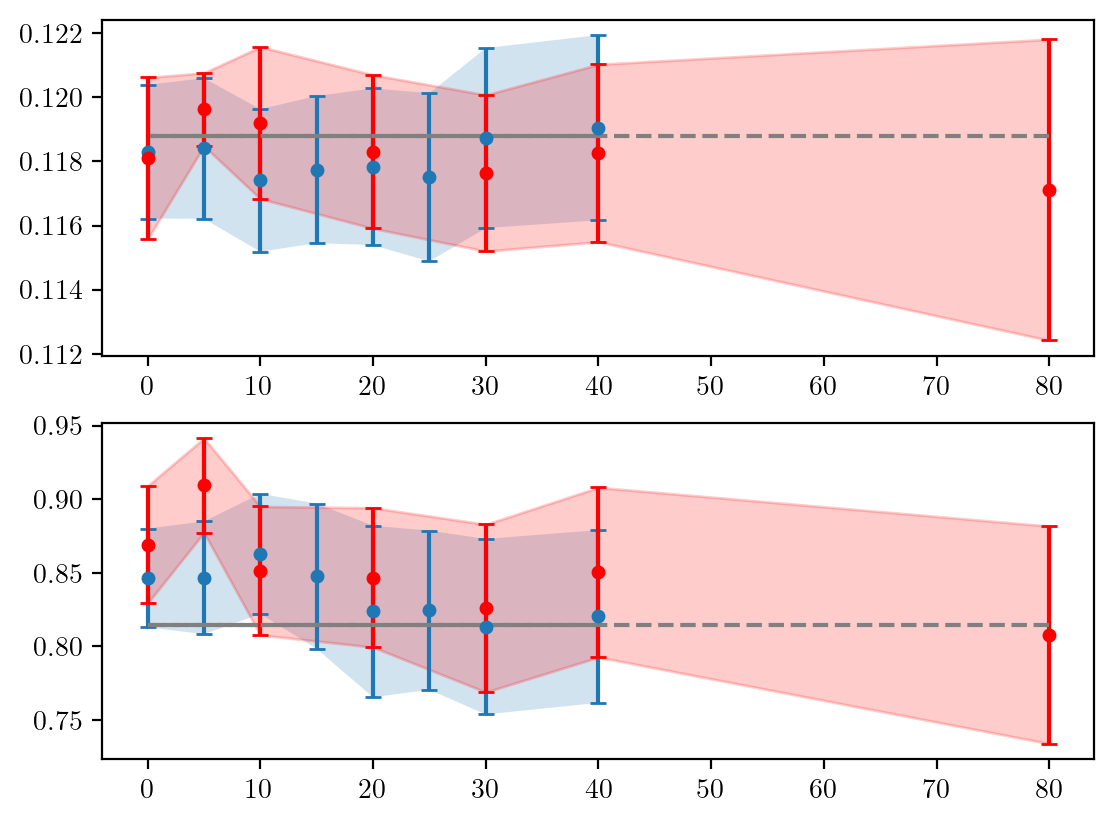

IndexError: Color index out of range 14

<Figure size 400x400 with 0 Axes>

In [85]:
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels = {
    "omega_b": r"\omega_{\rm b}",
    "omega_cdm": r"\omega_{\rm cdm}",
    "sigma8_m": r"\sigma_8",
    "n_s": r"n_s",
    "nrun": r"\alpha_s",
    "N_ur": r"N_{\rm ur}",
    "w0_fld": r"w_0",
    "wa_fld": r"w_a",
    "logM_1": r"\log M_1",
    "logM_cut": r"\log M_{\rm cut}",
    "alpha": r"\alpha",
    "alpha_s": r"\alpha_{\rm vel, s}",
    "alpha_c": r"\alpha_{\rm vel, c}",
    "sigma": r"\log \sigma",
    "kappa": r"\kappa",
    "A_cen": r"A_{\rm cen}",
    "A_sat": r"A_{\rm sat}",
    "B_cen": r"B_{\rm cen}",
    "B_sat": r"B_{\rm sat}",
    "s": r"$s$",
    "fsigma8": r"f \sigma_8",
    "Omega_m": r"\Omega_{\rm m}",
    "H0": r"H_0",
}


# stats = ['wst', 'dsc_conf', 'dsc_fourier', 'minkowski']

chains = []

# truth = dict(zip(lhc_x_names, lhc_x[idx_fit]))

truth = {
    'Omega_m': 0.3089,
    'omega_cdm': 0.1188,
    'omega_b': 0.02230,
    'h': 0.6774,
    'n_s': 0.9667,
    'sigma8_m': 0.8147
}


# smins = [5, 10, 15, 20, 30, 40]
smins = [0, 5, 10, 15, 20, 25, 30, 40][::-1]

omega_cdm = []
sigma8_m = []

for smin in smins:

    data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/diffsky/no_emuerr_fixedns/tpcf/posterior_cosmo+hod_smin{smin}.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    samples = MCSamples(
                samples=data['samples'],
                weights=data['weights'],
                names=data['names'],
                ranges=data['ranges'],
                labels=[labels[n] for n in data['names']],
            )
    chains.append(samples)

    omega_cdm.append([samples.mean('omega_cdm'), samples.std('omega_cdm')])
    sigma8_m.append([samples.mean('sigma8_m'), samples.std('sigma8_m')])
    
omega_cdm = np.asarray(omega_cdm)
sigma8_m = np.asarray(sigma8_m)
    
fig, ax = plt.subplots(2, 1)
ax[0].fill_between(smins, omega_cdm[:, 0] - omega_cdm[:, 1], omega_cdm[:, 0] + omega_cdm[:, 1], alpha=0.2)
ax[1].fill_between(smins, sigma8_m[:, 0] - sigma8_m[:, 1], sigma8_m[:, 0] + sigma8_m[:, 1], alpha=0.2)
ax[0].errorbar(smins, omega_cdm[:, 0], omega_cdm[:, 1], marker='o', ls='', capsize=3, ms=4.0)
ax[1].errorbar(smins, sigma8_m[:, 0], sigma8_m[:, 1], marker='o', ls='', capsize=3, ms=4.0)

ax[0].plot(smins, [truth['omega_cdm']]*len(smins), ls='--', color='grey')
ax[1].plot(smins, [truth['sigma8_m']]*len(smins), ls='--', color='grey')
# plt.show()

omega_cdm = []
sigma8_m = []
smins = [0, 5, 10, 20, 30, 40, 80][::-1]
for smin in smins:

    data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/diffsky/fixedns_fixedomb/dsc_conf/posterior_cosmo+hod_smin{smin}.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    samples = MCSamples(
                samples=data['samples'],
                weights=data['weights'],
                names=data['names'],
                ranges=data['ranges'],
                labels=[labels[n] for n in data['names']],
            )
    chains.append(samples)

    omega_cdm.append([samples.mean('omega_cdm'), samples.std('omega_cdm')])
    sigma8_m.append([samples.mean('sigma8_m'), samples.std('sigma8_m')])
    
omega_cdm = np.asarray(omega_cdm)
sigma8_m = np.asarray(sigma8_m)
    
# fig, ax = plt.subplots(2, 1)
ax[0].fill_between(smins, omega_cdm[:, 0] - omega_cdm[:, 1], omega_cdm[:, 0] + omega_cdm[:, 1], alpha=0.2, color='r')
ax[1].fill_between(smins, sigma8_m[:, 0] - sigma8_m[:, 1], sigma8_m[:, 0] + sigma8_m[:, 1], alpha=0.2, color='r')
ax[0].errorbar(smins, omega_cdm[:, 0], omega_cdm[:, 1], marker='o', ls='', capsize=3, ms=4.0, color='r')
ax[1].errorbar(smins, sigma8_m[:, 0], sigma8_m[:, 1], marker='o', ls='', capsize=3, ms=4.0, color='r')

ax[0].plot(smins, [truth['omega_cdm']]*len(smins), ls='--', color='grey')
ax[1].plot(smins, [truth['sigma8_m']]*len(smins), ls='--', color='grey')
plt.show()
    
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = ":"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = False
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6

g.triangle_plot(
    roots=chains,
    legend_labels=smins,
    filled=True,
    markers=truth,
    params=['omega_cdm', 'sigma8_m'],
    title_limit=1,
    # params=['logM_cut', 'logM_1']
    # legend_labels=stats
)
plt.show()
# plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


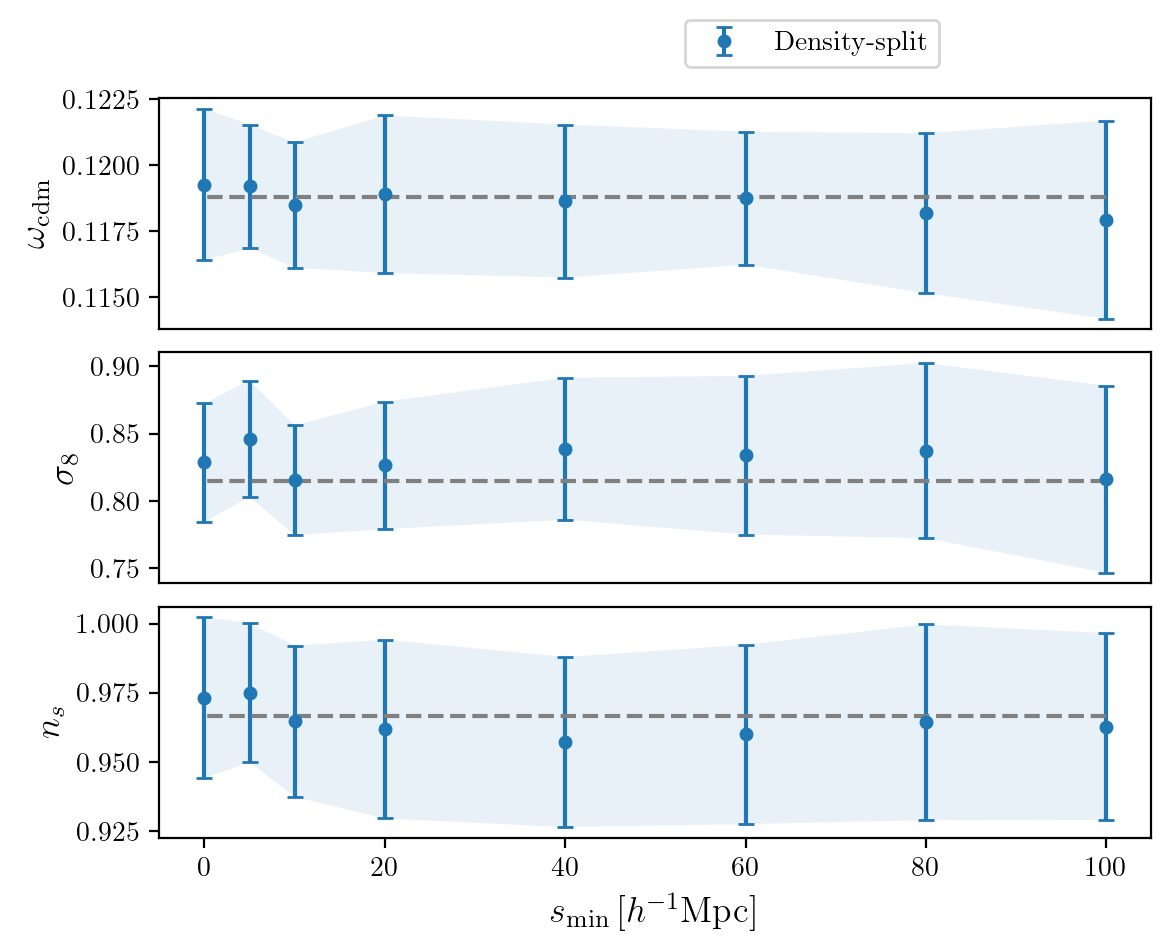

In [59]:
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels = {
    "omega_b": r"$\omega_{\rm b}$",
    "omega_cdm": r"$\omega_{\rm cdm}$",
    "sigma8_m": r"$\sigma_8$",
    "n_s": r"$n_s$",
    "nrun": r"$\alpha_s$",
    "N_ur": r"$N_{\rm ur}$",
    "w0_fld": r"$w_0$",
    "wa_fld": r"$w_a$",
    "logM_1": r"$\log M_1$",
    "logM_cut": r"$\log M_{\rm cut}$",
    "alpha": r"$\alpha$",
    "alpha_s": r"$\alpha_{\rm vel, s}$",
    "alpha_c": r"$\alpha_{\rm vel, c}$",
    "sigma": r"$\log \sigma$",
    "kappa": r"$\kappa$",
    "A_cen": r"$A_{\rm cen}$",
    "A_sat": r"$A_{\rm sat}$",
    "B_cen": r"$B_{\rm cen}$",
    "B_sat": r"$B_{\rm sat}$",
    "s": r"$s$",
    "fsigma8": r"$f \sigma_8$",
    "Omega_m": r"$\Omega_{\rm m}$",
    "H0": r"$H_0$",
}

labels_stats = {
    'dsc_conf': r'Density-split',
    'dsc_conf_cross': r'Density-split (CCF)',
    'tpcf': r'Galaxy 2PCF',
    'tpcf+dsc_conf': r'DSC + Galaxy 2PCF',
}


chains = []

truth = {
    'Omega_m': 0.3089,
    'omega_cdm': 0.1188,
    'omega_b': 0.02230,
    'h': 0.6774,
    'n_s': 0.9667,
    'sigma8_m': 0.8147
}

smins = np.array([0, 5, 10, 20, 40, 60, 80, 100][::-1])

phase_idx = 2
params = ['omega_cdm', 'sigma8_m', 'n_s']
# statistics = ['tpcf', 'tpcf+dsc_conf']
statistics = ['dsc_conf']

fig, ax = plt.subplots(len(params), 1)

for istat, statistic in enumerate(statistics):

    constraints = {}
    for param in params:
        constraints[param] = []

    for smin in smins:

        data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/diffsky/aug8/{statistic}/'
        data_fn = Path(data_dir) / f'posterior_cosmo+hod_smin{smin}_galsampled_diffsky_mock_67120_fixedAmp_{phase_idx:03}_mass_conc_v0.3.npy'
        data = np.load(data_fn, allow_pickle=True).item()
        samples = MCSamples(
                    samples=data['samples'],
                    weights=data['weights'],
                    names=data['names'],
                    ranges=data['ranges'],
                    labels=[labels[n] for n in data['names']],
                )
        chains.append(samples)

        for param in params:
            constraints[param].append([samples.mean(param), samples.std(param)])

    for param in params:
        constraints[param] = np.asarray(constraints[param])


    for i, param in enumerate(params):
        ax[i].fill_between(smins, constraints[param][:, 0] - constraints[param][:, 1],
                           constraints[param][:, 0] + constraints[param][:, 1], alpha=0.1)
        ax[i].errorbar(smins + 1.5*istat, constraints[param][:, 0], constraints[param][:, 1],
                       marker='o', ls='', capsize=3, ms=4.0, label=labels_stats[statistic])
        ax[i].plot(smins, [truth[param]]*len(smins), ls='--', color='grey')

        ax[i].set_ylabel(labels[param], fontsize=13)
    
for aa in ax[:-1]:
    aa.axes.get_xaxis().set_visible(False)
    
ax[-1].set_xlabel(r'$s_{\rm min}\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[0].legend(bbox_to_anchor=(0.8, 1.4), ncols=len(statistics))
plt.subplots_adjust(hspace=0.1)
plt.show()
    

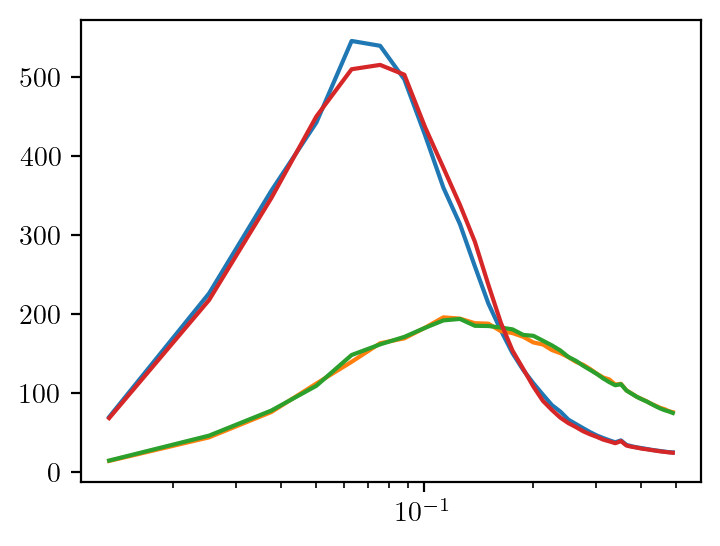

In [20]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

data_dir = '/pscratch/sd/e/epaillas/emc/data_vectors/diffsky/dsc_fourier/z0.5/'
data_fn = Path(data_dir) / 'dsc_fourier_galsampled_diffsky_mock_67120_fixedAmp_001_mass_conc_v0.3.npy'
data = np.load(data_fn, allow_pickle=True).item()

k = data['k']
poles = data['diffsky_y'].reshape(2, 4, 2, -1)

fig, ax = plt.subplots(figsize=(4, 3))

for i in range(4):
    ax.plot(k, k**2*poles[1, i, 0, :len(k)])
    
ax.set_xscale('log')
plt.show()

Removed no burn in


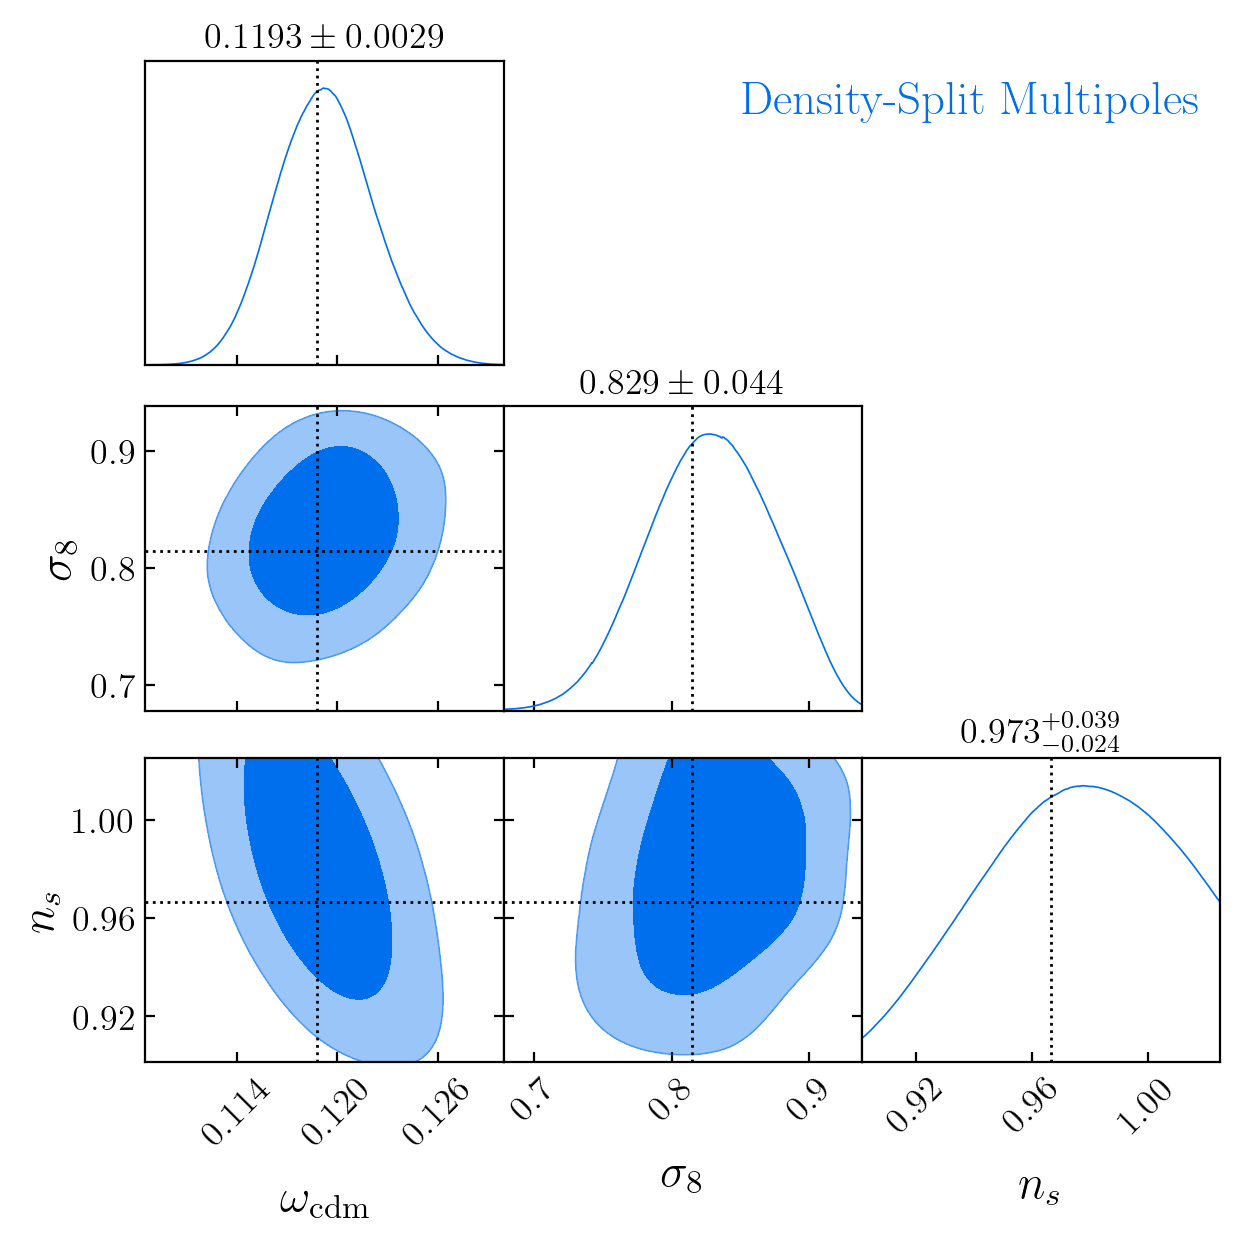

In [2]:
import numpy as np
from getdist import plots, MCSamples
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


labels = {
    "omega_b": r"$\omega_{\rm b}$",
    "omega_cdm": r"$\omega_{\rm cdm}$",
    "sigma8_m": r"$\sigma_8$",
    "n_s": r"$n_s$",
    "nrun": r"$\alpha_s$",
    "N_ur": r"$N_{\rm ur}$",
    "w0_fld": r"$w_0$",
    "wa_fld": r"$w_a$",
    "logM_1": r"$\log M_1$",
    "logM_cut": r"$\log M_{\rm cut}$",
    "alpha": r"$\alpha$",
    "alpha_s": r"$\alpha_{\rm vel, s}$",
    "alpha_c": r"$\alpha_{\rm vel, c}$",
    "sigma": r"$\log \sigma$",
    "kappa": r"$\kappa$",
    "A_cen": r"$A_{\rm cen}$",
    "A_sat": r"$A_{\rm sat}$",
    "B_cen": r"$B_{\rm cen}$",
    "B_sat": r"$B_{\rm sat}$",
    "s": r"$s$",
    "fsigma8": r"$f \sigma_8$",
    "Omega_m": r"$\Omega_{\rm m}$",
    "H0": r"$H_0$",
}

labels_stats = {
    'dsc_conf': 'Density-Split Multipoles',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'tpcf+dsc_conf': 'DSC + Galaxy 2PCF',
}

chains = []

smin = 0
phase_idx = 2
truth = {
    'Omega_m': 0.3089,
    'omega_cdm': 0.1188,
    'omega_b': 0.02230,
    'h': 0.6774,
    'n_s': 0.9667,
    'sigma8_m': 0.8147
}

params = ['omega_cdm', 'sigma8_m', 'n_s']
statistics = ['dsc_conf']

for istat, statistic in enumerate(statistics):

    data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/diffsky/aug8/{statistic}/'
    data_fn = Path(data_dir) / f'posterior_cosmo+hod_smin{smin}_galsampled_diffsky_mock_67120_fixedAmp_{phase_idx:03}_mass_conc_v0.3.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    samples = MCSamples(
                samples=data['samples'],
                weights=data['weights'],
                names=data['names'],
                ranges=data['ranges'],
                labels=[labels[n] for n in data['names']],
            )
    chains.append(samples)


g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = ":"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = False
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6

g.triangle_plot(
    roots=chains,
    legend_labels=[labels_stats[stat] for stat in statistics],
    filled=True,
    markers=truth,
    params=params,
    title_limit=1,
    # params=['logM_cut', 'logM_1']
    # legend_labels=stats
)
plt.show()
# plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in


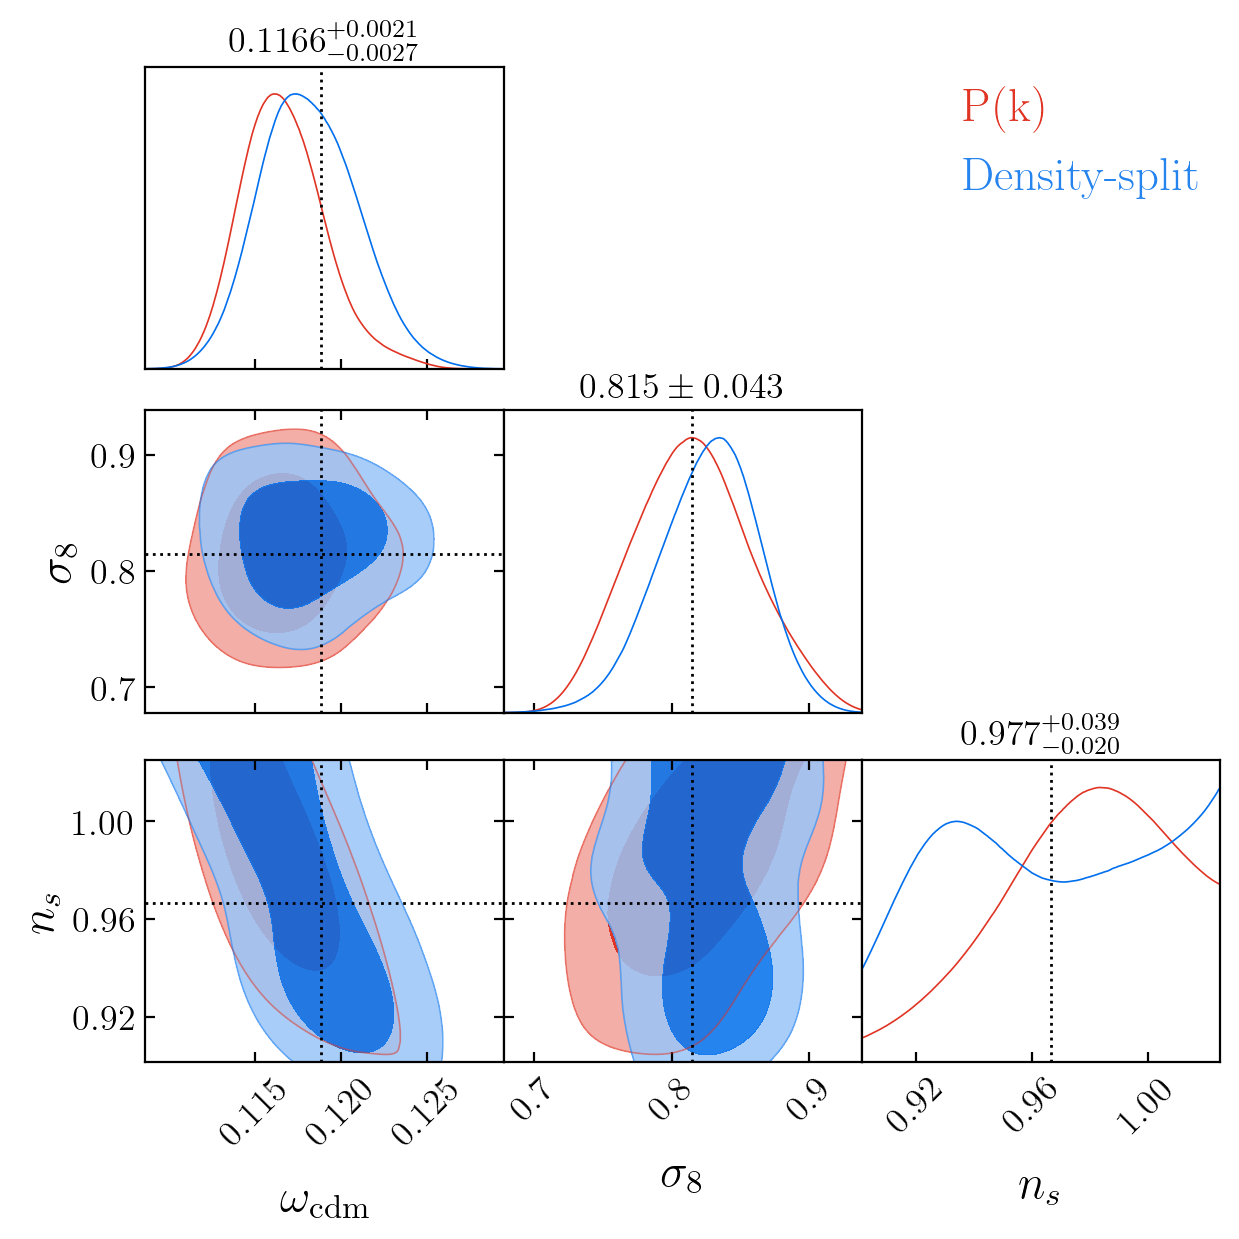

In [3]:
import numpy as np
from getdist import plots, MCSamples
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


labels = {
    "omega_b": r"$\omega_{\rm b}$",
    "omega_cdm": r"$\omega_{\rm cdm}$",
    "sigma8_m": r"$\sigma_8$",
    "n_s": r"$n_s$",
    "nrun": r"$\alpha_s$",
    "N_ur": r"$N_{\rm ur}$",
    "w0_fld": r"$w_0$",
    "wa_fld": r"$w_a$",
    "logM_1": r"$\log M_1$",
    "logM_cut": r"$\log M_{\rm cut}$",
    "alpha": r"$\alpha$",
    "alpha_s": r"$\alpha_{\rm vel, s}$",
    "alpha_c": r"$\alpha_{\rm vel, c}$",
    "sigma": r"$\log \sigma$",
    "kappa": r"$\kappa$",
    "A_cen": r"$A_{\rm cen}$",
    "A_sat": r"$A_{\rm sat}$",
    "B_cen": r"$B_{\rm cen}$",
    "B_sat": r"$B_{\rm sat}$",
    "s": r"$s$",
    "fsigma8": r"$f \sigma_8$",
    "Omega_m": r"$\Omega_{\rm m}$",
    "H0": r"$H_0$",
}

labels_stats = {
    'dsc_conf': 'Density-Split Multipoles',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'tpcf+dsc_conf': 'DSC + Galaxy 2PCF',
}

chains = []

smin = 0
phase_idx = 2
truth = {
    'Omega_m': 0.3089,
    'omega_cdm': 0.1188,
    'omega_b': 0.02230,
    'h': 0.6774,
    'n_s': 0.9667,
    'sigma8_m': 0.8147
}

params = ['omega_cdm', 'sigma8_m', 'n_s']
statistics = ['dsc_conf']
legend = []

data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/diffsky/pk/base'
data_fn = Path(data_dir) / f'chain_z0.5_fixedAmp_ph001_mass_conc_v0.3_k0.00-0.50.npy'
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['param_names'],
            ranges=data['param_ranges'],
            labels=[labels[n] for n in data['param_names']],
        )
legend.append('P(k)')
chains.append(samples)

data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/diffsky/dsc_fourier/base'
data_fn = Path(data_dir) / f'chain_z0.5_fixedAmp_ph001_mass_conc_v0.3_k0.00-0.50.npy'
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['param_names'],
            ranges=data['param_ranges'],
            labels=[labels[n] for n in data['param_names']],
        )
legend.append('Density-split')
chains.append(samples)


g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = ":"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = False
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6

g.triangle_plot(
    roots=chains,
    legend_labels=legend,
    filled=True,
    markers=truth,
    params=params,
    title_limit=1,
    # params=['logM_cut', 'logM_1']
    # legend_labels=stats
)
plt.show()
# plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in


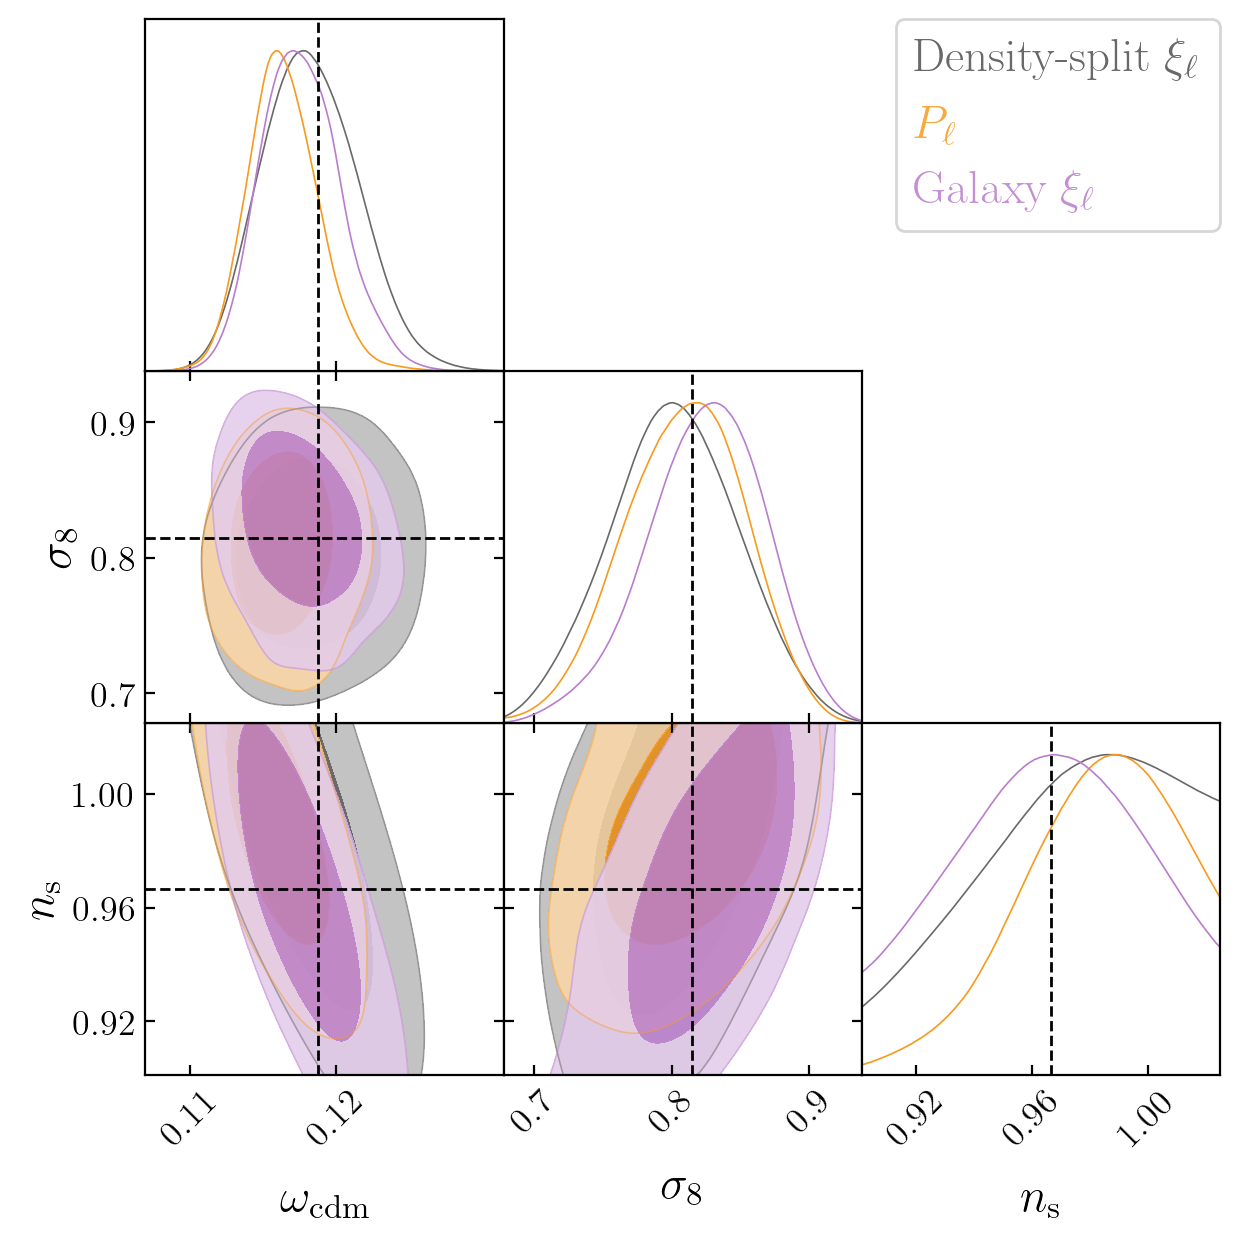

In [3]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 30
smin = 0
kmin, kmax = 0.0, 1.0
truth = {
    'Omega_m': 0.3089,
    'omega_cdm': 0.1188,
    'omega_b': 0.02230,
    'h': 0.6774,
    'n_s': 0.9667,
    'sigma8_m': 0.8147
}
legend_labels = []

params = ['omega_cdm', 'sigma8_m', 'n_s']
# params = ['logM_cut', 'logM_1', 'B_cen', 'B_sat']




data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/diffsky/dsc_conf/'
data_fn = Path(data_dir) / f'chain_z0.5_fixedAmp_002_mass_conc_v0.3.npy'
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
legend_labels.append(r'$\textrm{Density-split }\xi_\ell$')

data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/diffsky/oct2/pk/'
data_fn = Path(data_dir) / f'chain_z0.5_fixedAmp_002_mass_conc_v0.3.npy'
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
legend_labels.append(r'$P_\ell$')

data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/diffsky/tpcf/'
data_fn = Path(data_dir) / f'chain_z0.5_fixedAmp_002_mass_conc_v0.3.npy'
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
legend_labels.append(r'$\textrm{Galaxy }\xi_\ell$')

/pscratch/sd/c/cuesta/emc/chains/pk/chain_cosmo-idx111_hod-idx30.npy

    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd'][::-1]
# g.settings.line_styles = g.settings.solid_colors

          
g.triangle_plot(
    roots=chains,
    legend_labels=legend_labels,
    markers=truth,
    params=params,
    filled=True,
    # filled=[False, True, True, True, True],
    # title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats
)
plt.show()
# # plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# # plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
['omega_b', 'omega_cdm', 'sigma8_m', 'n_s', 'logM_cut', 'logM_1', 'sigma', 'alpha', 'kappa', 'alpha_c', 'alpha_s', 's', 'A_cen', 'A_sat', 'B_cen', 'B_sat']


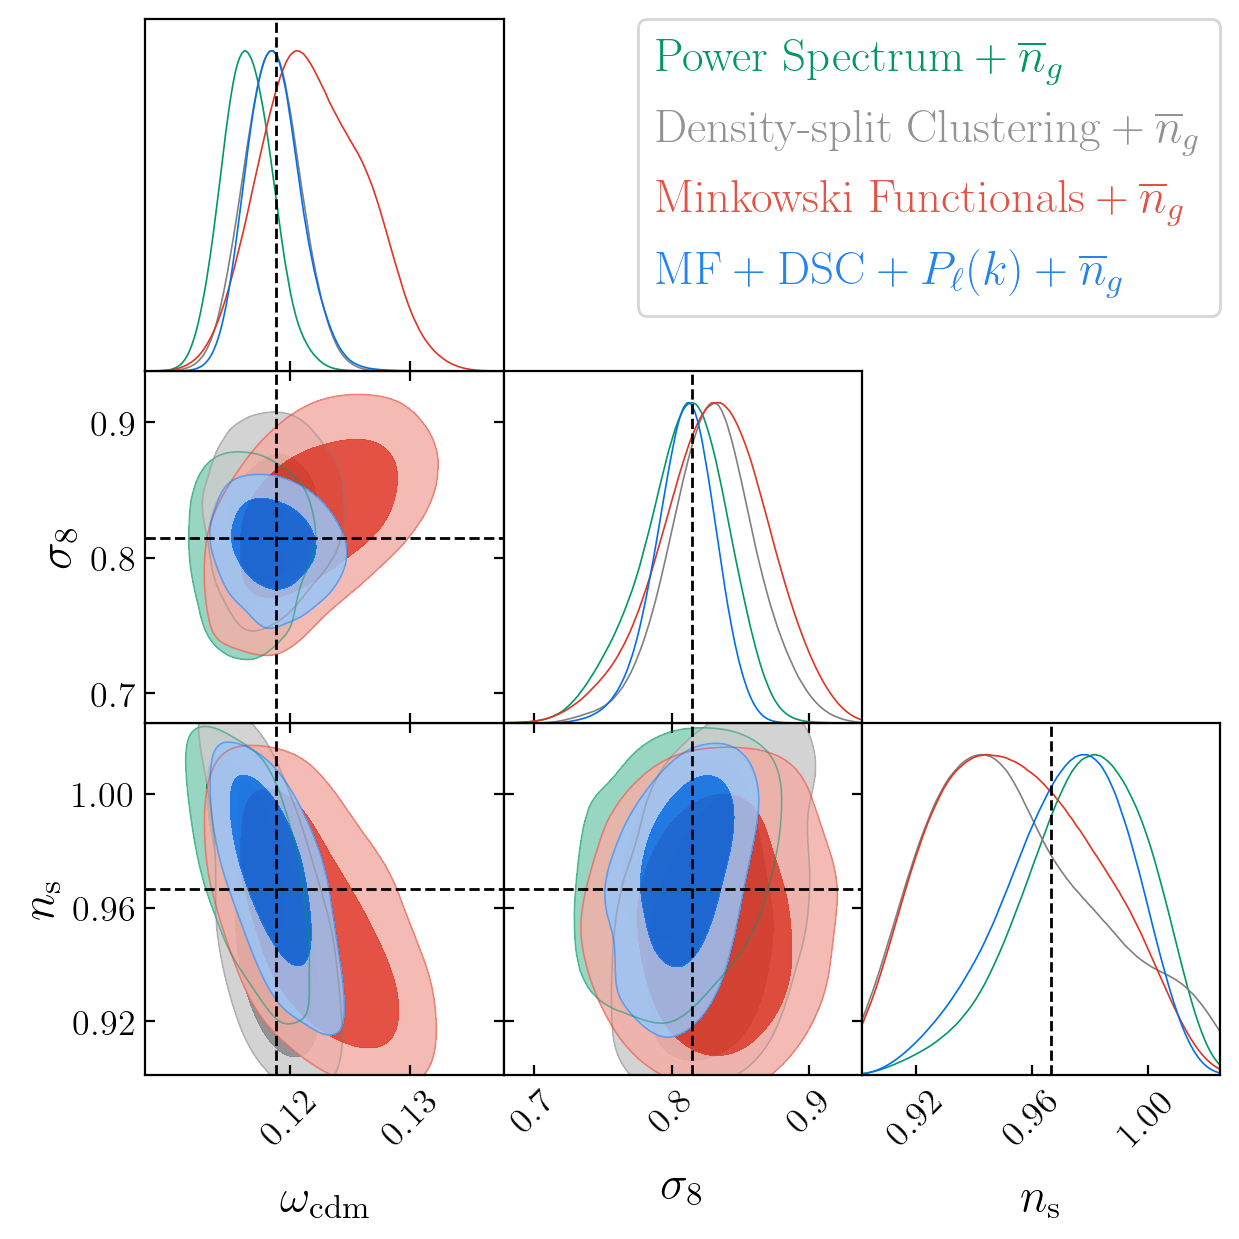

In [15]:
import matplotlib.pyplot as plt
from pathlib import Path
from getdist import plots, MCSamples
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

legend_labels = []

params = ['omega_cdm', 'sigma8_m', 'n_s']
# params = ['omega_cdm', 'sigma8_m', 'n_s']
# params = ['A_cen', 'A_sat', 'B_cen', 'B_sat']


data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/diffsky/base_lcdm'
data_fn = Path(data_dir) / f"pk+number_density_k0.00-0.50_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$\textrm{Power Spectrum} + \overline{n}_g$')

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/diffsky/base_lcdm'
data_fn = Path(data_dir) / f"dsc_pk+number_density_k0.00-0.50_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$\textrm{Density-split Clustering} + \overline{n}_g$')

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/diffsky/base_lcdm'
data_fn = Path(data_dir) / f"minkowski+number_density_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$\textrm{Minkowski Functionals} + \overline{n}_g$')

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/diffsky/base_lcdm'
data_fn = Path(data_dir) / f"minkowski+dsc_pk+pk+number_density_k0.00-0.50_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$\textrm{MF} + \textrm{DSC} + P_\ell(k) + \overline{n}_g$')


markers = data['markers']
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
# g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd'][::-1]
# g.settings.line_styles = g.settings.solid_colors

g.triangle_plot(
    roots=chains,
    legend_labels=legend_labels,
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    markers=markers,
    params=params,
    filled=True,
    # filled=[False, True, True, True, True],
    # title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats
)

print(data['names'])
        
# ndim = len(params)
# finished = []
# ax_idx = 0
# for i, param1 in enumerate(params):
#     for j, param2 in enumerate(params[::-1]):
#         # if i <= j:
#             # continue
#         if param2 in finished: continue
#         # print(param1, param2, i, j, ax_idx, data['names'].index(param1))
#         if param1 != param2:
#             g.fig.axes[ax_idx].plot(maxl[data['names'].index(param1)],
#                                     maxl[data['names'].index(param2)],
#                                     marker='*', ms=10.0, color='k', mew=1.0, mfc='w')
#         ax_idx += 1
#     finished.append(param1)
# g.fig.axes[1].plot(maxl[1], maxl[2], marker='*', ms=10.0, color='k')
# g.fig.axes[3].plot(maxl[2], maxl[3], marker='*', ms=10.0, color='k')
plt.show()
# # plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# # plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

In [34]:
samples.mean('logM_cut')

12.665045738220215